In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))
def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))
def error(X,Y,theta):
    h=hypothesis(X,theta)
    error=Y*(np.log(h))+(1-Y)*(np.log(1-h))
    fin_error=-1*np.mean(error)
    return fin_error
def gradient(X,Y,theta):
    h=hypothesis(X,theta)
    grad=np.dot(X.T,(Y-h))
    m=X.shape[0]
    return grad/m
def gradientDescent(X,Y,lr=0.5,max_iter=500):
    m,n=X.shape
    theta=np.zeros((n,))
    error_list=[]
    for i in range(max_iter):
        err=error(X,Y,theta)
        error_list.append(err)
        grad=gradient(X,Y,theta)
        theta=theta+lr*grad
    return theta,error_list


[0.37908544 2.92294737 4.79220624]


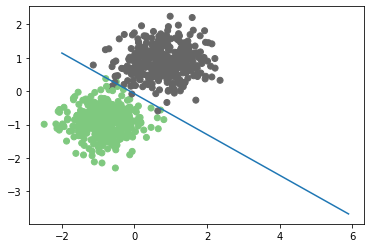

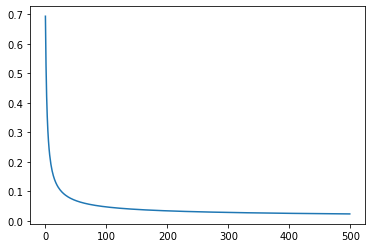

In [37]:
mean_1=np.array([1,0.5])
cov_1=np.array([[1,0.1],[0.1,1.2]])
mean_2=np.array([4,5])
cov_2=np.array([[1.2,0.1],[0.1,1.3]])
dist_1=np.random.multivariate_normal(mean_1,cov_1,500)
dist_2=np.random.multivariate_normal(mean_2,cov_2,500)

data=np.zeros((1000,3))
data[:500,:2]=dist_1
data[500:,:2]=dist_2
data[500:,-1]=1
np.random.shuffle(data)

split=int(0.8*data.shape[0])
X_train=data[:split,:2]
X_test=data[split:,:2]
Y_train=data[:split,-1]
Y_test=data[split:,-1]
##normalize
X_mean=X_train.mean(axis=0)
X_std=X_train.std(axis=0)
X_train=(X_train-X_mean)/(X_std)
X_test=(X_test-X_mean)/(X_std)
##adding
one1=np.ones((X_train.shape[0],1))
X_train=np.hstack((one1.reshape(-1,1),X_train))
one2=np.ones((X_test.shape[0],1))
X_test=np.hstack((one2.reshape(-1,1),X_test))
###########
theta,error_list=gradientDescent(X_train,Y_train)
print(theta)
x1=np.arange(-2,6,0.1)
x2=-(theta[0]+theta[1]*x1)/theta[2]
plt.scatter(X_train[:,1],X_train[:,2],c=Y_train,cmap=plt.cm.Accent)
plt.plot(x1,x2)
plt.show()
plt.plot(error_list)
plt.show()

In [52]:
def predict(X,theta):
        x=hypothesis(X,theta)
        output=np.zeros((x.shape[0],1))
        output[x>0.5]=1
        output=output.astype('int')
        return output
def accuracy(actual,pred):
    actual=actual.astype('int')
    actual=actual.reshape((-1,1))
    
    ans=np.sum(actual==pred)/actual.shape[0]
    return ans*100
xtrainpred=predict(X_train,theta)
acc=accuracy(Y_train,xtrainpred)
xtestpred=predict(X_test,theta)
acc2=accuracy(Y_test,xtestpred)
print(acc)
print(acc2)

99.5
99.0
